In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#1
df1 = pd.read_excel("Classeur1.xlsx")

df1

,Branch,Grade,Name,Author
0,Programming,1,C++ Programming Languages,Bjarne stroustrup
1,Programming,2,An Introduction to Database Systems,C.J Date
2,Programming,3,Pandas for Data Analysis,Wes McKinney
3,Engineering,1,Heat engineering,John H.Lienhard
4,Engineering,2,Enterprise management,Jeff Thompson


In [23]:
df2 = pd.read_excel("Classeur2.xlsx")

df2

,Name,Publisher,Pages,Year,Hardcover
0,C++ Programming Languages,BHV,681,1973,True
1,An Introduction to Database Systems,Springer,1360,2011,False
2,Pandas for Data Analysis,O'Reilly,541,2013,True
3,Heat engineering,Pearson Eduction,678,1981,False
4,Enterprise management,Cambridge,385,2012,False


In [40]:
#2_outerjoin
df3=pd.merge(df1,df2,on="Name",how="outer")
df3 = df3.set_index(['Name'])
df3

,Branch,Grade,Author,Publisher,Pages,Year,Hardcover
Name,,,,,,,
C++ Programming Languages,Programming,1,Bjarne stroustrup,BHV,681,1973,True
An Introduction to Database Systems,Programming,2,C.J Date,Springer,1360,2011,False
Pandas for Data Analysis,Programming,3,Wes McKinney,O'Reilly,541,2013,True
Heat engineering,Engineering,1,John H.Lienhard,Pearson Eduction,678,1981,False
Enterprise management,Engineering,2,Jeff Thompson,Cambridge,385,2012,False


In [41]:
#3 
year = 2010
df3["10 years ago"] = df2["Year"].apply(lambda x: 1 if x>=year else 0 )
df3

,Branch,Grade,Author,Publisher,Pages,Year,Hardcover,10 years ago
Name,,,,,,,,
C++ Programming Languages,Programming,1,Bjarne stroustrup,BHV,681,1973,True,NaN
An Introduction to Database Systems,Programming,2,C.J Date,Springer,1360,2011,False,NaN
Pandas for Data Analysis,Programming,3,Wes McKinney,O'Reilly,541,2013,True,NaN
Heat engineering,Engineering,1,John H.Lienhard,Pearson Eduction,678,1981,False,NaN
Enterprise management,Engineering,2,Jeff Thompson,Cambridge,385,2012,False,NaN


In [42]:
def Ex_4():
    new_df = df3.groupby(['Year']).agg('min').head(2)
    author = list(new_df['Author'])[1]
    col = df3.index[df3['Author'] == author].tolist()[0]
    a = new_df.index[new_df['Author'] == author].tolist()[0]
    return (a,col)
Ex_4()

(1981, 'Heat engineering')

In [43]:
#5
def mean_func(x):
    mean_pages = df3['Pages'].mean()
    return x['Pages']>=mean_pages

df3.groupby('Pages').filter(mean_func)


,Branch,Grade,Author,Publisher,Pages,Year,Hardcover,10 years ago
Name,,,,,,,,
An Introduction to Database Systems,Programming,2,C.J Date,Springer,1360,2011,False,NaN


In [33]:
#6
grade = df3.groupby(['Grade'])['Grade'].count()
min_val =  df3.groupby(['Grade'])['Grade'].count().min()
print('Grade - ',grade.index[grade.values == min_val][0])

Grade -  3


In [29]:
#7
min_page  = df3['Pages'].min()
df3[(df3['Pages']==min_page) & (df3['Hardcover']==False)]

,Branch,Grade,Name,Author,Publisher,Pages,Year,Hardcover,10 years ago
4,Engineering,2,Enterprise management,Jeff Thompson,Cambridge,385,2012,False,1


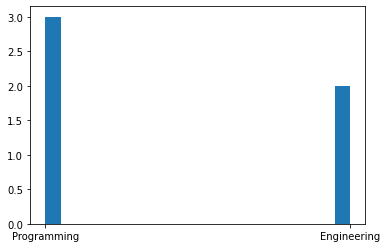

In [32]:
#8
x = [df3['Branch']]
plt.hist(x,bins=20)
plt.show()